In [1]:
import pandas as pd
import matplotlib.pyplot as plt
corolla=pd.read_excel("corolla.xlsx")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


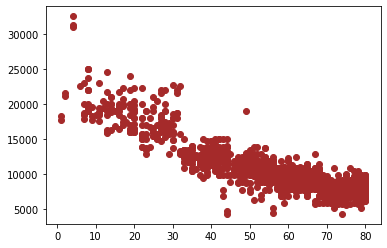

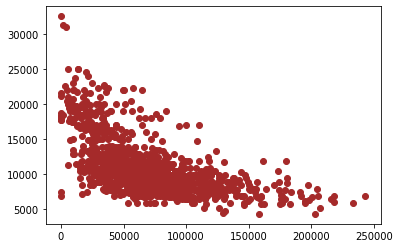

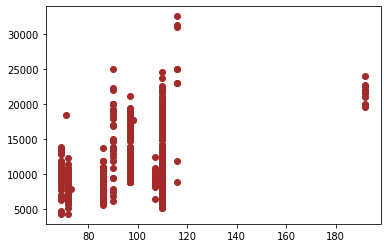

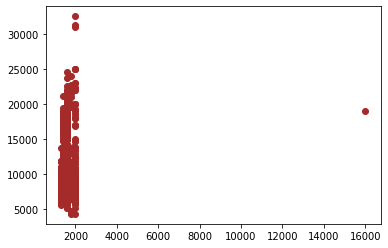

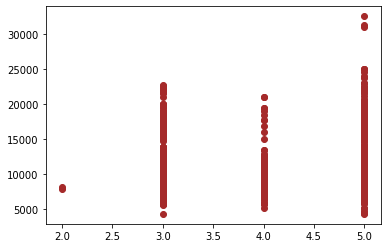

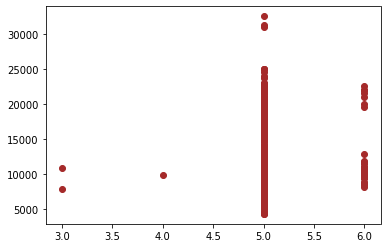

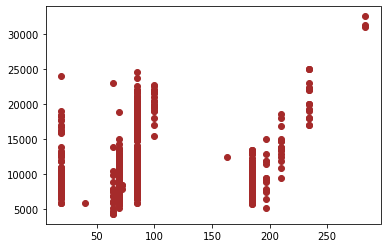

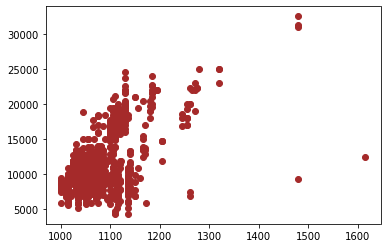

In [11]:
#EDA
corolla.shape
corolla.dtypes
corolla.isna
corolla.describe()
# only looking at the variables that we need
plt.scatter(x=corolla['Age_08_04'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['KM'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['HP'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['cc'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Doors'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Gears'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Quarterly_Tax'],y=corolla['Price'],color="brown")
plt.show()
plt.scatter(x=corolla['Weight'],y=corolla['Price'],color="brown")
plt.show()

In [14]:
corolla_new=corolla[['Price','Age_08_04','KM','HP','Quarterly_Tax','Weight','Automatic_airco','Guarantee_Period','Powered_Windows']].copy()
corolla_new.head()

summary=corolla_new.describe()
summary

,Price,Age_08_04,KM,HP,Quarterly_Tax,Weight,Automatic_airco,Guarantee_Period,Powered_Windows
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,87.122563,1072.45961,0.056407,3.815460,0.561978
std,3626.964585,18.599988,37506.448872,14.981080,41.128611,52.64112,0.230786,3.011025,0.496317
min,4350.000000,1.000000,1.000000,69.000000,19.000000,1000.00000,0.000000,3.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,69.000000,1040.00000,0.000000,3.000000,0.000000
50%,9900.000000,61.000000,63389.500000,110.000000,85.000000,1070.00000,0.000000,3.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,85.000000,1085.00000,0.000000,3.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,283.000000,1615.00000,1.000000,36.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split
corolla_train,corolla_test=train_test_split(corolla_new,test_size=0.3)

import statsmodels.formula.api as slm
model1=slm.ols('Price~Age_08_04+KM+HP+Quarterly_Tax+Weight+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_train).fit()
model1.summary() #R^2 = 0.887

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     981.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:42:25   Log-Likelihood:                -8564.2
No. Observations:                1005   AIC:                         1.715e+04
Df Residuals:                     996   BIC:                         1.719e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2998.0319   1129.063      2.655      0.008     782.416    5213.648
Age_08_04         -109.6188      3.026    -36.222      0.000    -115.557    -103.680
KM                  -0.0207      0.001    -14.809      0.000      -0.023      -0.018
HP                  27.5855      2.906      9.493      0.000      21.883      33.288
Quarterly_Tax        8.1987      1.420      5.775      0.000       5.413      10.985
Weight              10.2902      1.105      9.314      0.000       8.122      12.458
Automatic_airco   2814.3120    200.342     14.048      0.000    2421.172    3207.452
Guarantee_Period    73.1528     14.352      5.097      0.000      44.990     101.316
Powered_Windows    490.8070     83.069      5.908      0.000     327.796     653.818
==============================================================================
Omnibus:                       37.626   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.395
Skew:                          -0.022   Prob(JB):                     5.82e-23
Kurtosis:                       4.563   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#all variables have a pvalue less than 0.05 which means they are significant. However, we should check for their collinearity using VIF values
#VIF values

rsq_age=slm.ols('Age_08_04~KM+HP+Quarterly_Tax+Weight+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_age=1/(1-rsq_age) #2.06008
vif_age

rsq_KM=slm.ols('KM~Age_08_04+HP+Quarterly_Tax+Weight+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_KM=1/(1-rsq_KM) #1.749
vif_KM

rsq_HP=slm.ols('HP~Age_08_04+KM+Quarterly_Tax+Weight+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_HP=1/(1-rsq_HP) #1.397
vif_HP

rsq_qt=slm.ols('Quarterly_Tax~Age_08_04+KM+HP+Weight+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_qt=1/(1-rsq_qt) #2.35
vif_qt

rsq_wt=slm.ols('Weight~Age_08_04+KM+HP+Automatic_airco+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_wt=1/(1-rsq_qt) #2.354
vif_wt

rsq_aa=slm.ols('Automatic_airco~Age_08_04+KM+HP+Weight+Guarantee_Period+Powered_Windows',data=corolla_new).fit().rsquared
vif_aa=1/(1-rsq_aa) #1.418
vif_aa

rsq_gp=slm.ols('Guarantee_Period~Age_08_04+KM+HP+Weight+Automatic_airco+Powered_Windows',data=corolla_new).fit().rsquared
vif_gp=1/(1-rsq_gp) #1.05
vif_gp

rsq_pw=slm.ols('Powered_Windows~Age_08_04+KM+HP+Weight+Automatic_airco+Guarantee_Period',data=corolla_new).fit().rsquared
vif_pw=1/(1-rsq_pw) #1.1625
vif_pw

#as we can see all variables are less than 10 and therefore is not collinear

1.162535337639574

In [34]:
import numpy as np
predict_train=model1.predict(corolla_train)
err_train=predict_train-corolla_train.Price
rmse_train=np.sqrt(np.mean(err_train*err_train))
rmse_train #1215

predict_test=model1.predict(corolla_test)
err_test=predict_test-corolla_test.Price
rmse_test=np.sqrt(np.mean(err_test*err_test))
rmse_test #1191.32



1191.320468703741